In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Step 1: Import, Understanding, Reading data

In [2]:
data = pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.shape

(730, 16)

In [4]:
data.size

11680

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.isnull().sum()  # No null count in dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step 2: Data Cleaning & Handling missing values

In [8]:
# Mapping the numberical column to categorical column.

In [9]:
# Mapping the Season column
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
# Mapping the Season weathersit
data.weathersit = data.weathersit.map({1:'clear', 2:'Mist', 3:"light_snow_rain", 4: 'heavy_snow_rain'})

In [11]:
# Mapping the Season mnth
data.mnth = data.mnth.map({1:'Jan', 2:'Feb', 3:"March", 4:"April", 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [12]:
# Mapping the Season weekday
data.weekday = data.weekday.map({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thru', 5:'Fri', 6:'Sat' })

- Dropping the unwanted Column
- dteday we already have month weekday column 
- instant its an index column noting useful to us
- casual & registered for this columns we have cnt column which is sum of both.

In [13]:
# Dropping unwanted columns.
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [14]:
# Lets check missing value again for crs verify
data.isnull().sum()   # No missing valus find.

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Outlier Check

In [15]:
data.season.value_counts()  #No Outliers found

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
data.mnth.value_counts()            #No Outliers found

Jan      62
March    62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sept     60
Nov      60
Feb      56
Name: mnth, dtype: int64

In [17]:
data.holiday.value_counts()      #No Outliers found

0    709
1     21
Name: holiday, dtype: int64

In [18]:
data.workingday.value_counts()      #No Outliers found

1    504
0    226
Name: workingday, dtype: int64

In [19]:
data.weathersit.value_counts()     #No Outliers found

clear              463
Mist               246
light_snow_rain     21
Name: weathersit, dtype: int64

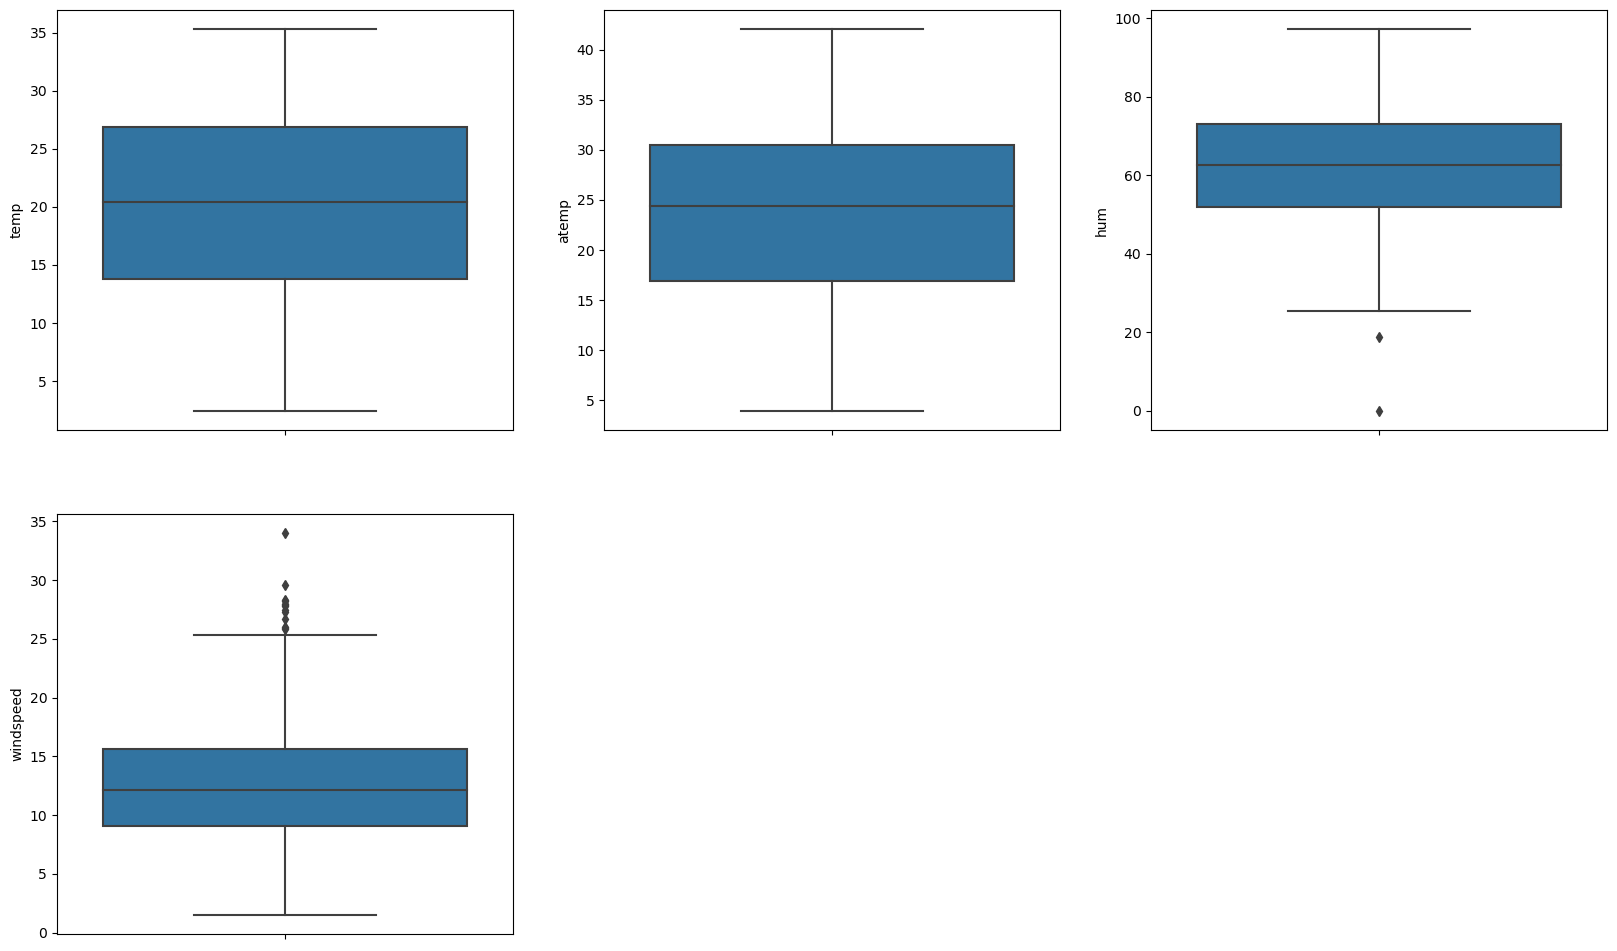

In [20]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(y='temp', data = data)
plt.subplot(2,3,2)
sns.boxplot(y='atemp', data = data)
plt.subplot(2,3,3)
sns.boxplot(y='hum', data = data)
plt.subplot(2,3,4)
sns.boxplot(y='windspeed', data = data)

plt.show()

- From abovew box plot No outliers are found in temp, atemp, windspeed, hum.

# Step 3: Data Visualising

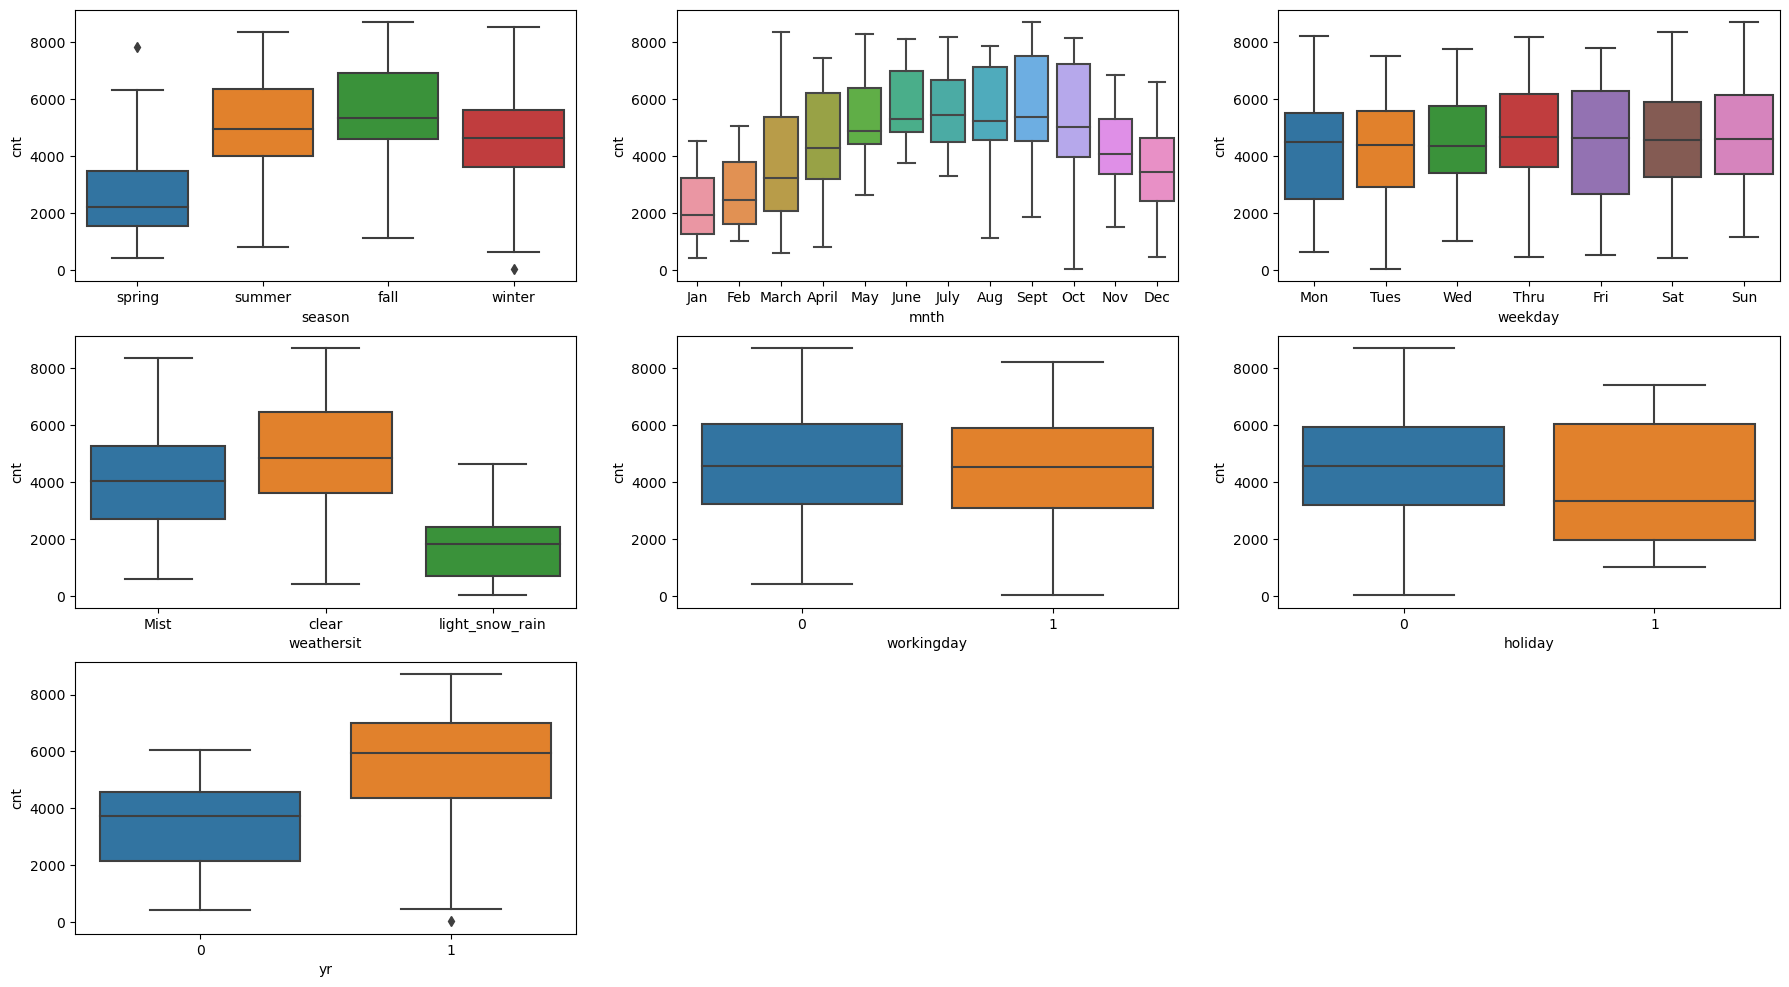

In [21]:
plt.figure(figsize=(22,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x='holiday', y='cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data = data)


plt.show()

- Season 3 Fall has highest number of count
- June to Sept has highest number of count & at Start & end of the year demant is decrease.
- Demand with respective to week days is same
- In holiday bike demand is decreases
- Bike demand has increases through year
- Demand is increase on clear weathersit & Mist weather, decrease on light_snow_rain seasons.

In [22]:
num = ['temp', 'atemp', 'hum', 'windspeed', 'workingday', 'season', 'cnt']

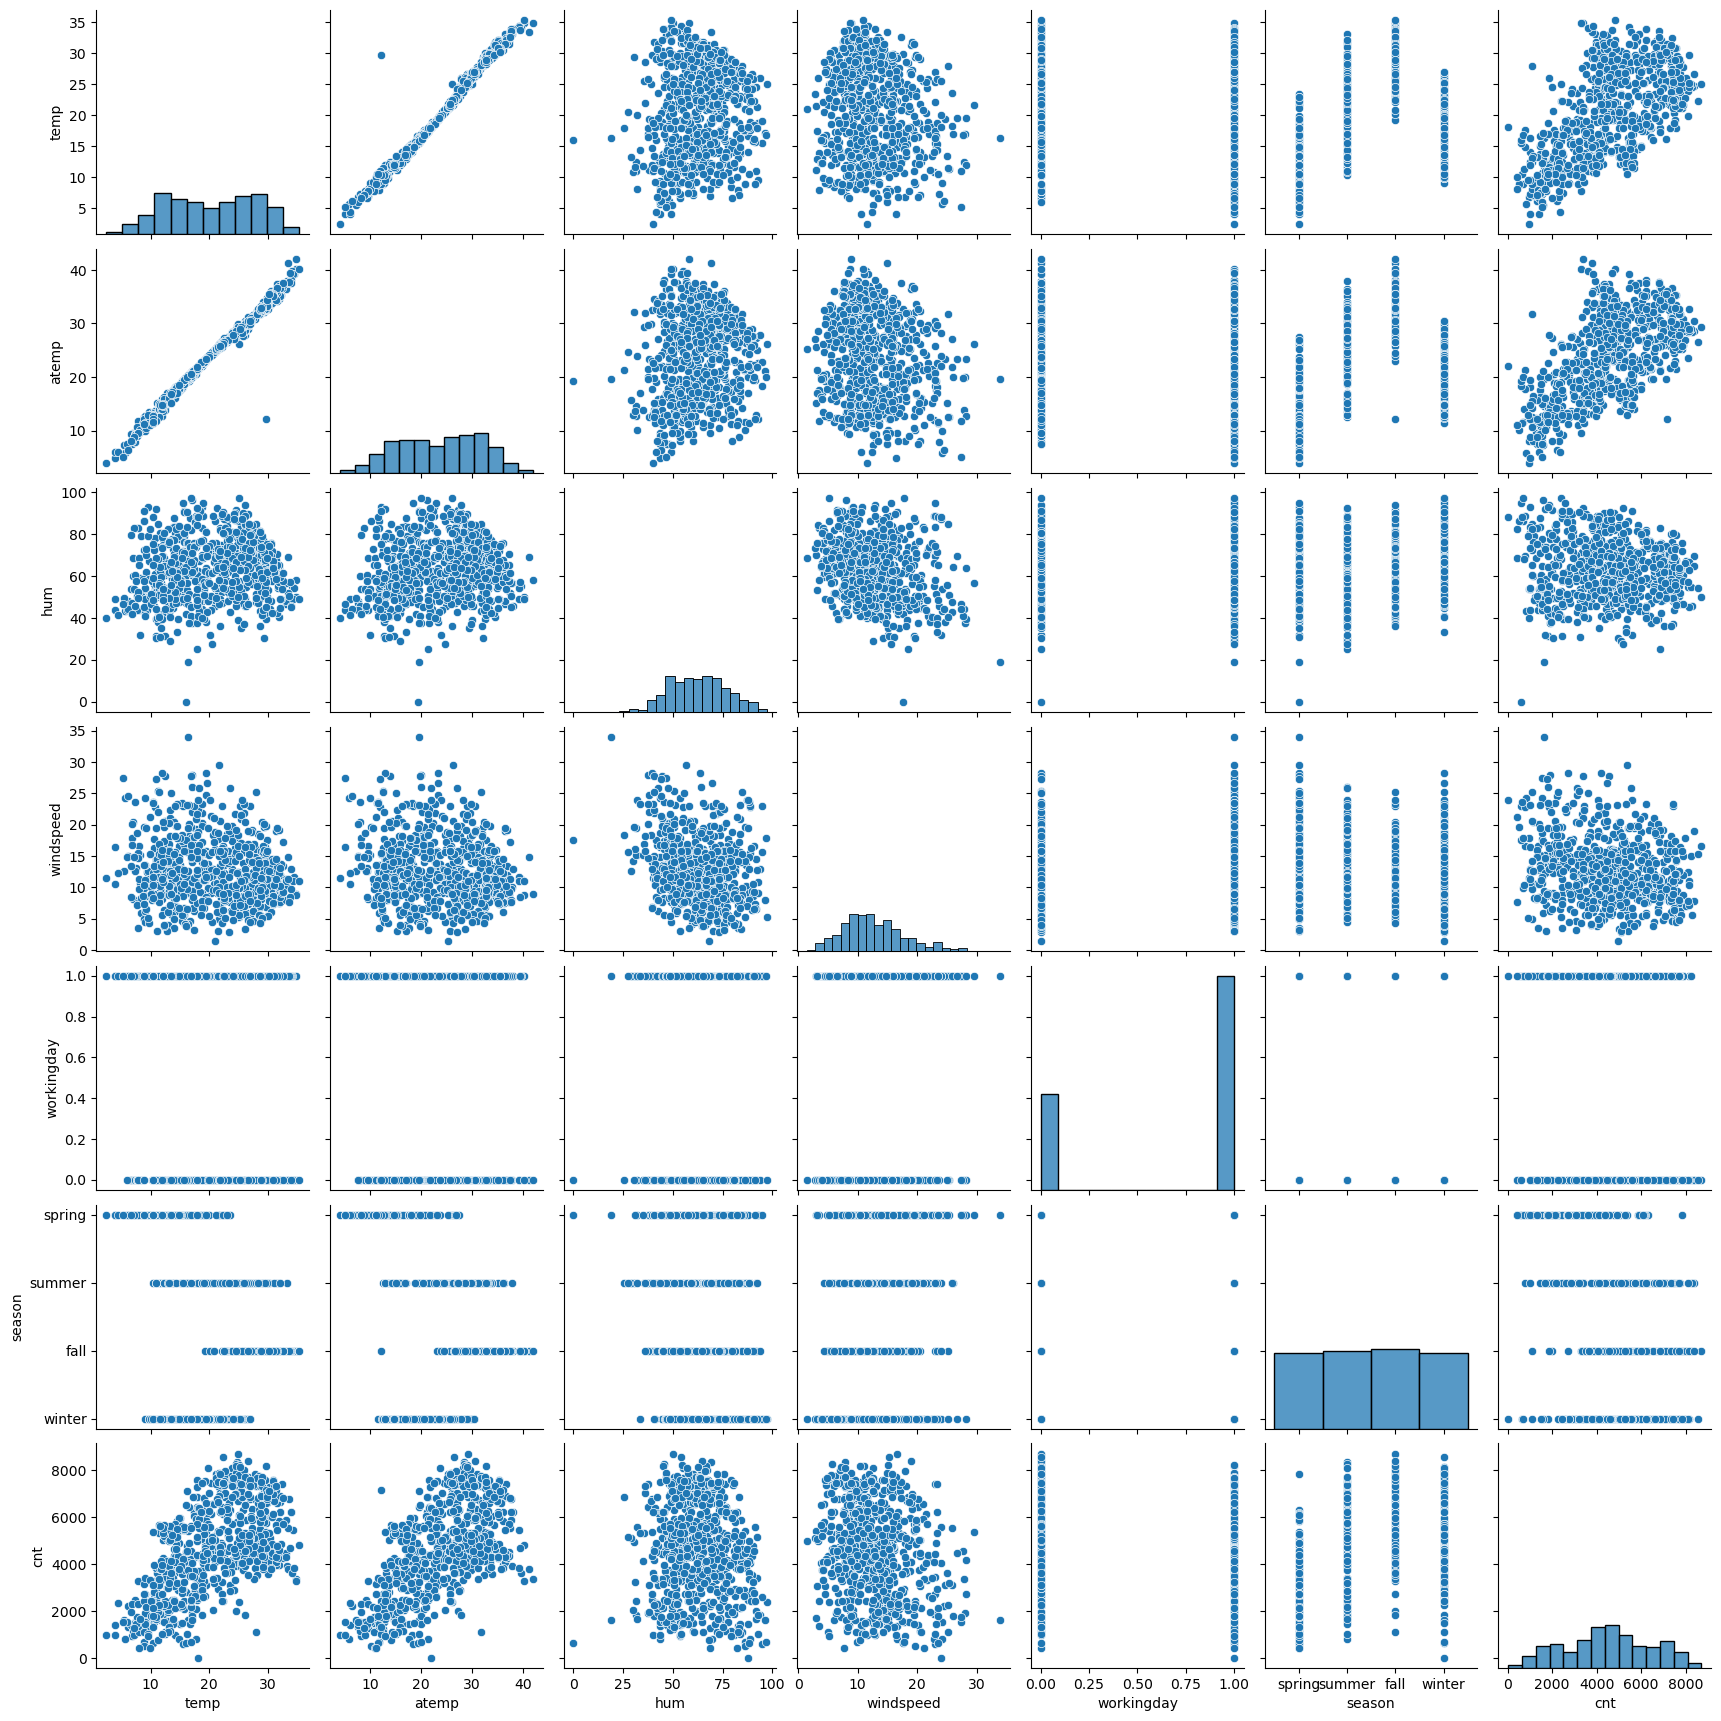

In [23]:
# Pairplot for Contiouns Numberical & Numerical  Vairbale
sns.pairplot(vars = num, data = data)
plt.show()

- From above pair plot it showing that temp & atemp have very goof corelation to each other  & also having good corelation w r to cnt target vaiable

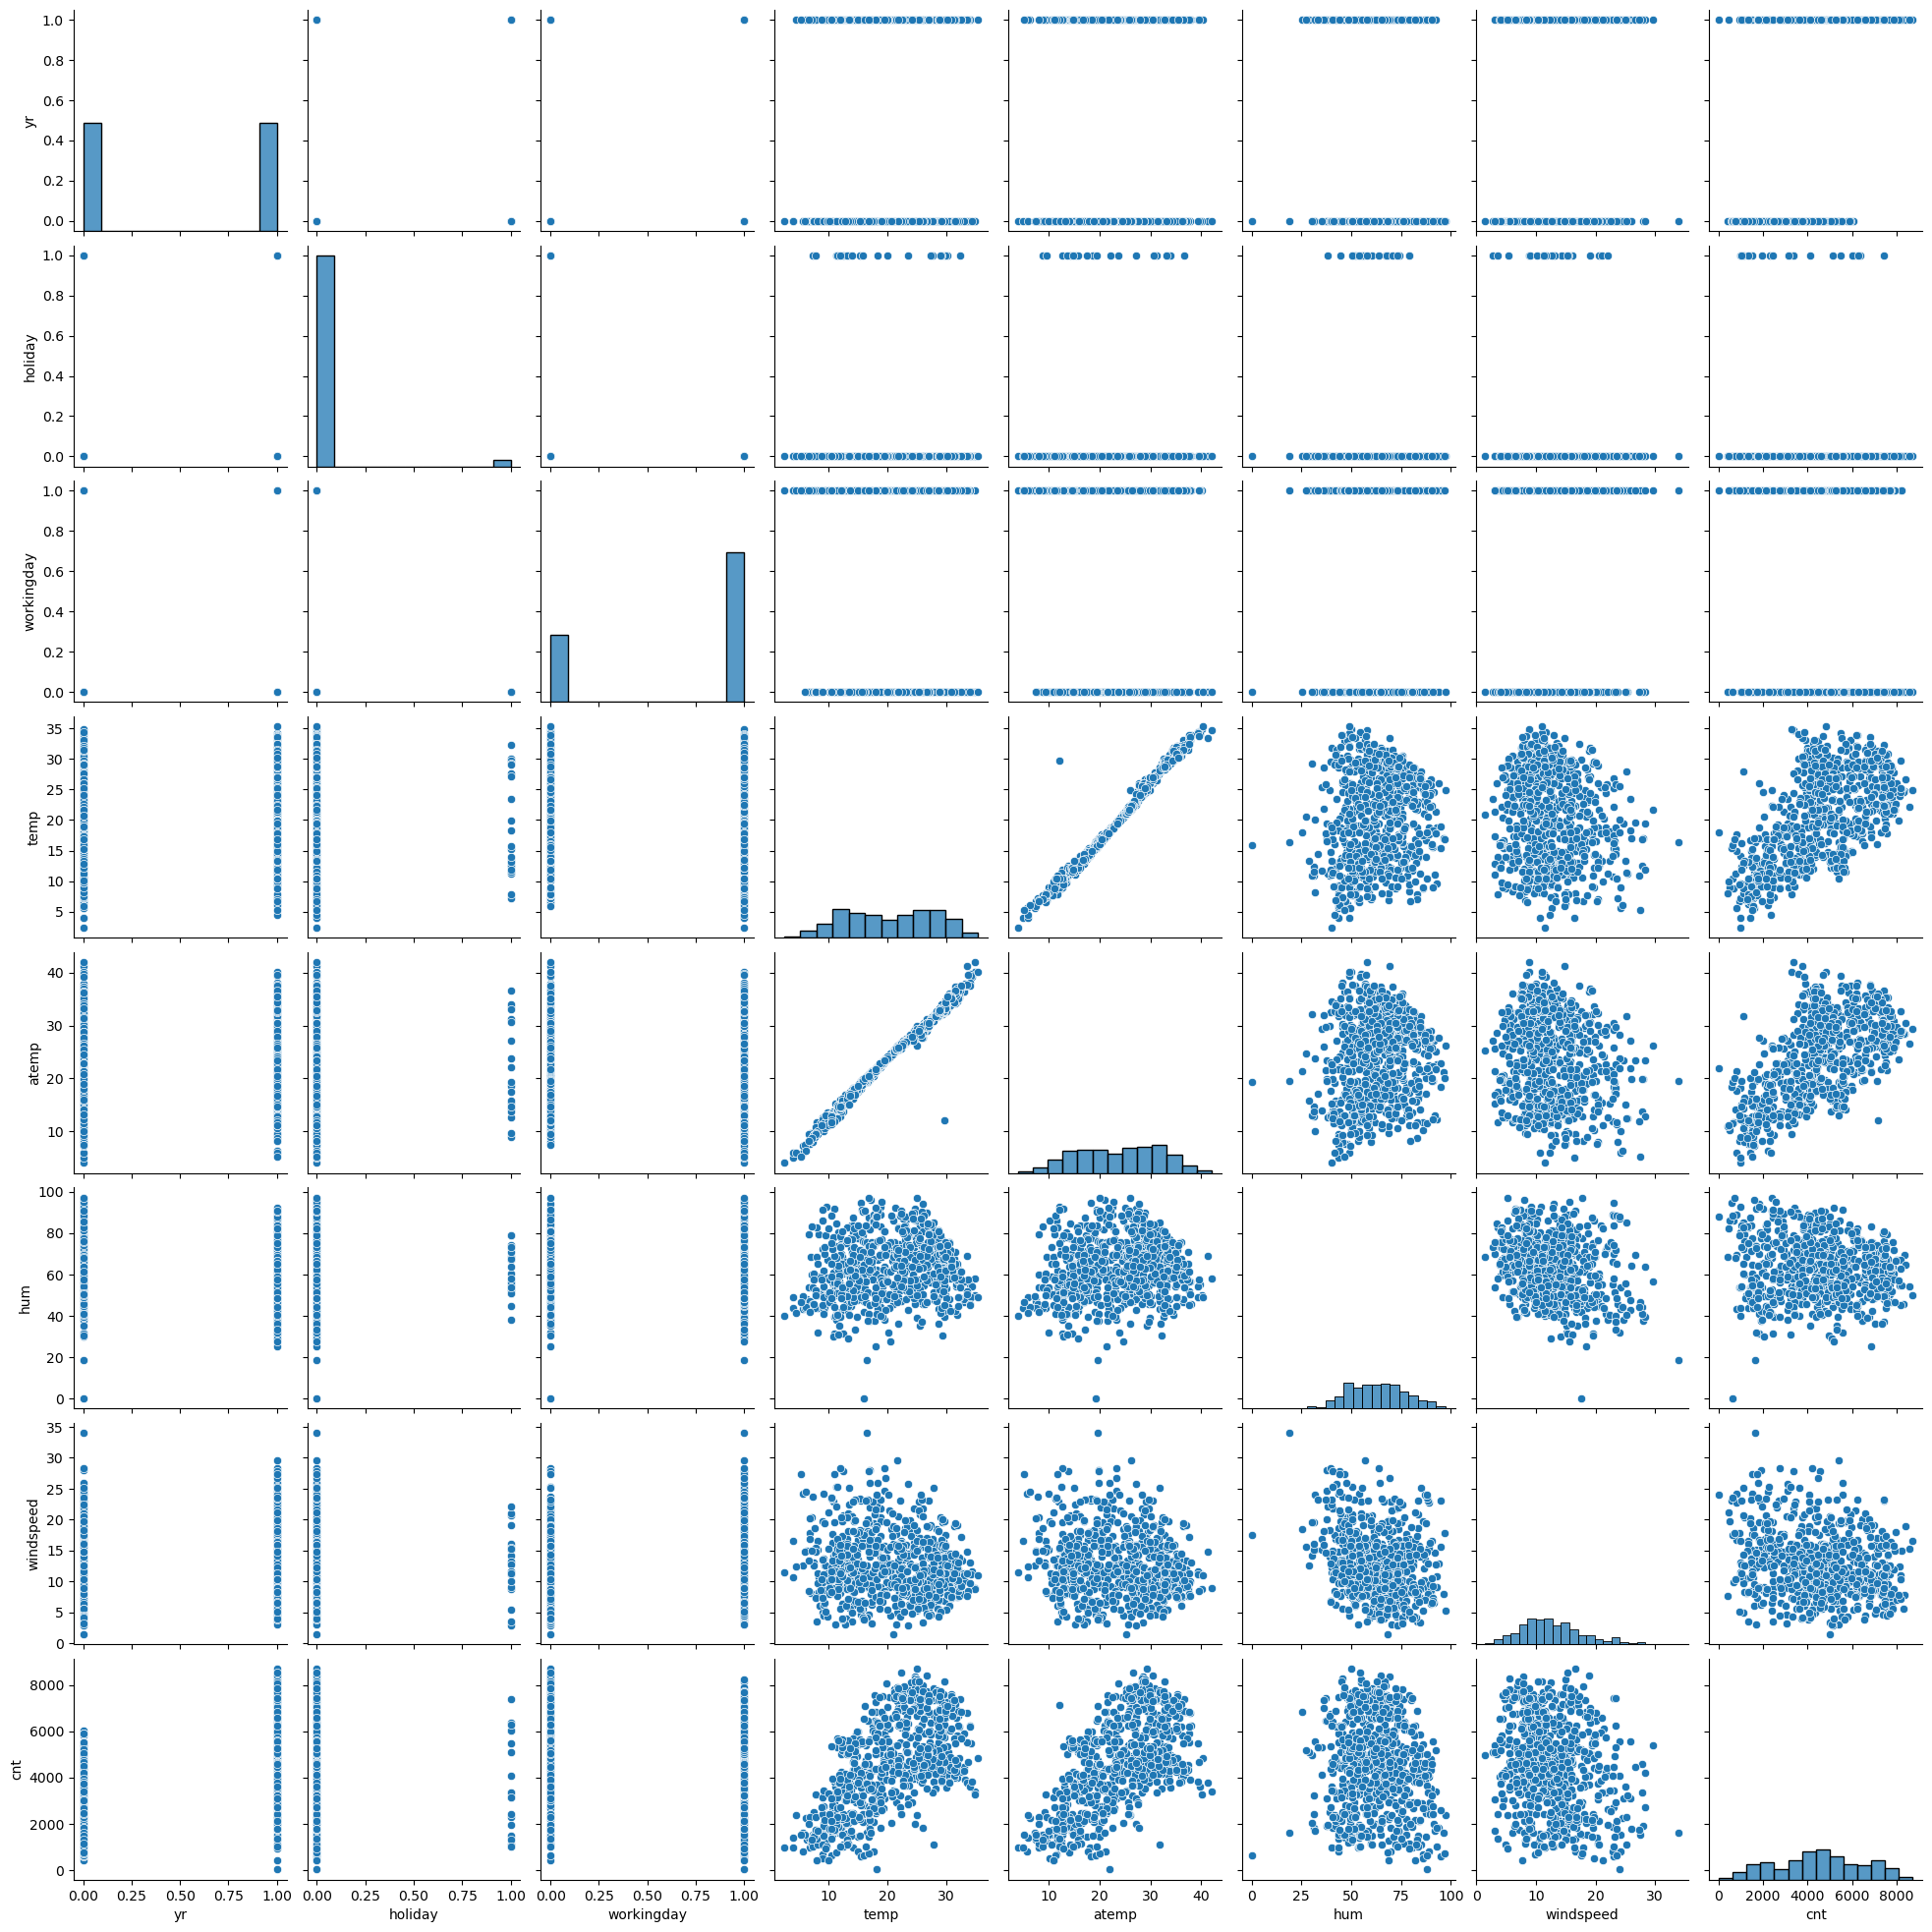

In [24]:
sns.pairplot(data)
plt.show()

In [25]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thru,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
num

['temp', 'atemp', 'hum', 'windspeed', 'workingday', 'season', 'cnt']

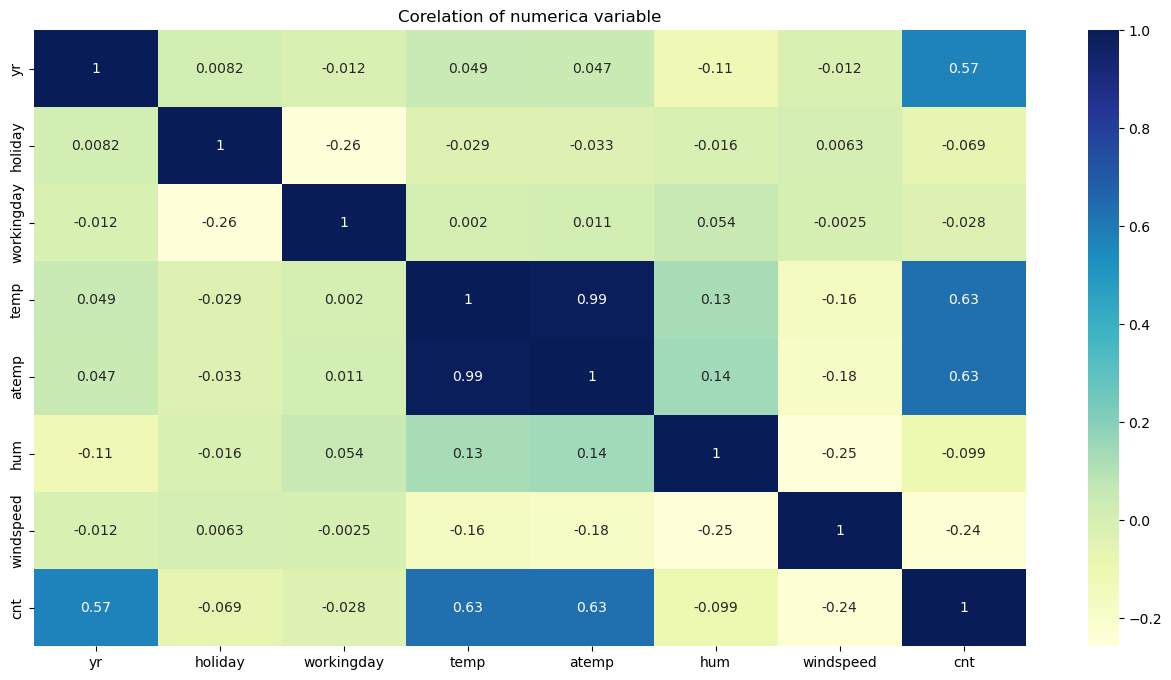

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu')
plt.title('Corelation of numerica variable')
plt.show()

- From above HeatMap following observations as shown:
- yr & cnt variable have good corelation
- temp & atemp vaiable have good corelation
- temp & cnt , atemp & cnt have good corelation

# Step 4: Data Prepration

In [28]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thru,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variable for season, mnth, weekday & weathersit

In [29]:
## dropping a redundant dummy variable

data_mnth = pd.get_dummies(data['mnth'], drop_first = True)
data_season = pd.get_dummies(data['season'], drop_first = True)
data_weekday = pd.get_dummies(data['weekday'], drop_first=True)
data_weathersit = pd.get_dummies(data['weathersit'], drop_first=True)

In [30]:
data = pd.concat([data, data_mnth,data_season,data_weekday,data_weathersit ], axis = 1)

In [31]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,1,0
3,spring,0,Jan,0,Thru,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [32]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept',
       'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun', 'Thru', 'Tues',
       'Wed', 'clear', 'light_snow_rain'],
      dtype='object')

In [33]:
# Dropping season, mnth, weekday, weathersit

data = data.drop(['mnth', 'season', 'weekday', 'weathersit'], axis = 1)

In [34]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Aug              730 non-null    uint8  
 9   Dec              730 non-null    uint8  
 10  Feb              730 non-null    uint8  
 11  Jan              730 non-null    uint8  
 12  July             730 non-null    uint8  
 13  June             730 non-null    uint8  
 14  March            730 non-null    uint8  
 15  May              730 non-null    uint8  
 16  Nov              730 non-null    uint8  
 17  Oct             

# Step 5: Spliting the data & Model Building

#### Splitting into Train & Test

In [36]:
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size=0.7, random_state=100)

print(data_train.shape)
print(data_test.shape)

(510, 30)
(220, 30)


#### Using MinMax Scaler for Scaling

In [37]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# applying MinMax scaler to all variables excet dummy vairables 
num_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [39]:
scaler = MinMaxScaler()
data_train[num_variables] = scaler.fit_transform(data_train[num_variables])

In [40]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,0


In [41]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
data_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
yr,1.000000,-0.014980,-0.003005,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.054774,-0.040049,...,0.018294,-0.027174,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,0.032398,-6.076399e-02
holiday,-0.014980,1.000000,-0.254149,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.052728,-0.004302,...,-0.063798,0.051582,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,0.048032,-2.815377e-02
workingday,-0.003005,-0.254149,1.000000,-0.007143,0.004316,0.021192,-0.002071,-0.009071,-0.012875,-0.025020,...,0.033299,0.033299,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,0.062137,8.289412e-03
temp,0.108054,-0.066405,-0.007143,1.000000,0.989539,0.155252,-0.187281,0.645048,0.387176,-0.273091,...,0.126057,-0.234200,-0.038042,0.024972,0.006540,0.074647,-0.002284,-0.044303,0.100510,-3.622709e-02
atemp,0.104971,-0.070760,0.004316,0.989539,1.000000,0.169341,-0.215108,0.647944,0.359727,-0.262072,...,0.136550,-0.211852,-0.037163,0.011785,0.006044,0.078295,0.002480,-0.041378,0.099074,-4.439780e-02
hum,-0.084061,-0.029224,0.021192,0.155252,0.169341,1.000000,-0.267126,-0.058793,0.052949,0.057615,...,-0.014192,0.173980,-0.030833,0.002489,-0.027699,-0.057323,0.033232,0.028329,-0.556435,2.449653e-01
windspeed,-0.000439,0.017458,-0.002071,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,-0.111460,-0.061179,...,0.110441,-0.090740,0.035097,-0.016545,0.018007,-0.021779,0.035326,-0.055798,-0.000932,8.677832e-02
cnt,0.591433,-0.095948,-0.009071,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.227578,-0.143546,...,0.140259,0.025945,-0.071013,0.012712,0.031474,0.110734,-0.018672,-0.020949,0.245832,-2.266784e-01
Aug,0.054774,-0.052728,-0.012875,0.387176,0.359727,0.052949,-0.111460,0.227578,1.000000,-0.098929,...,-0.186753,-0.186753,0.007536,0.032882,0.005308,0.018738,-0.064591,0.007209,0.004825,-5.675323e-02
Dec,-0.040049,-0.004302,-0.025020,-0.273091,-0.262072,0.057615,-0.061179,-0.143546,-0.098929,1.000000,...,-0.173818,0.317031,0.026120,-0.011872,0.043024,-0.083721,-0.011302,0.003762,-0.013065,-1.105587e-02


#### Training the Model

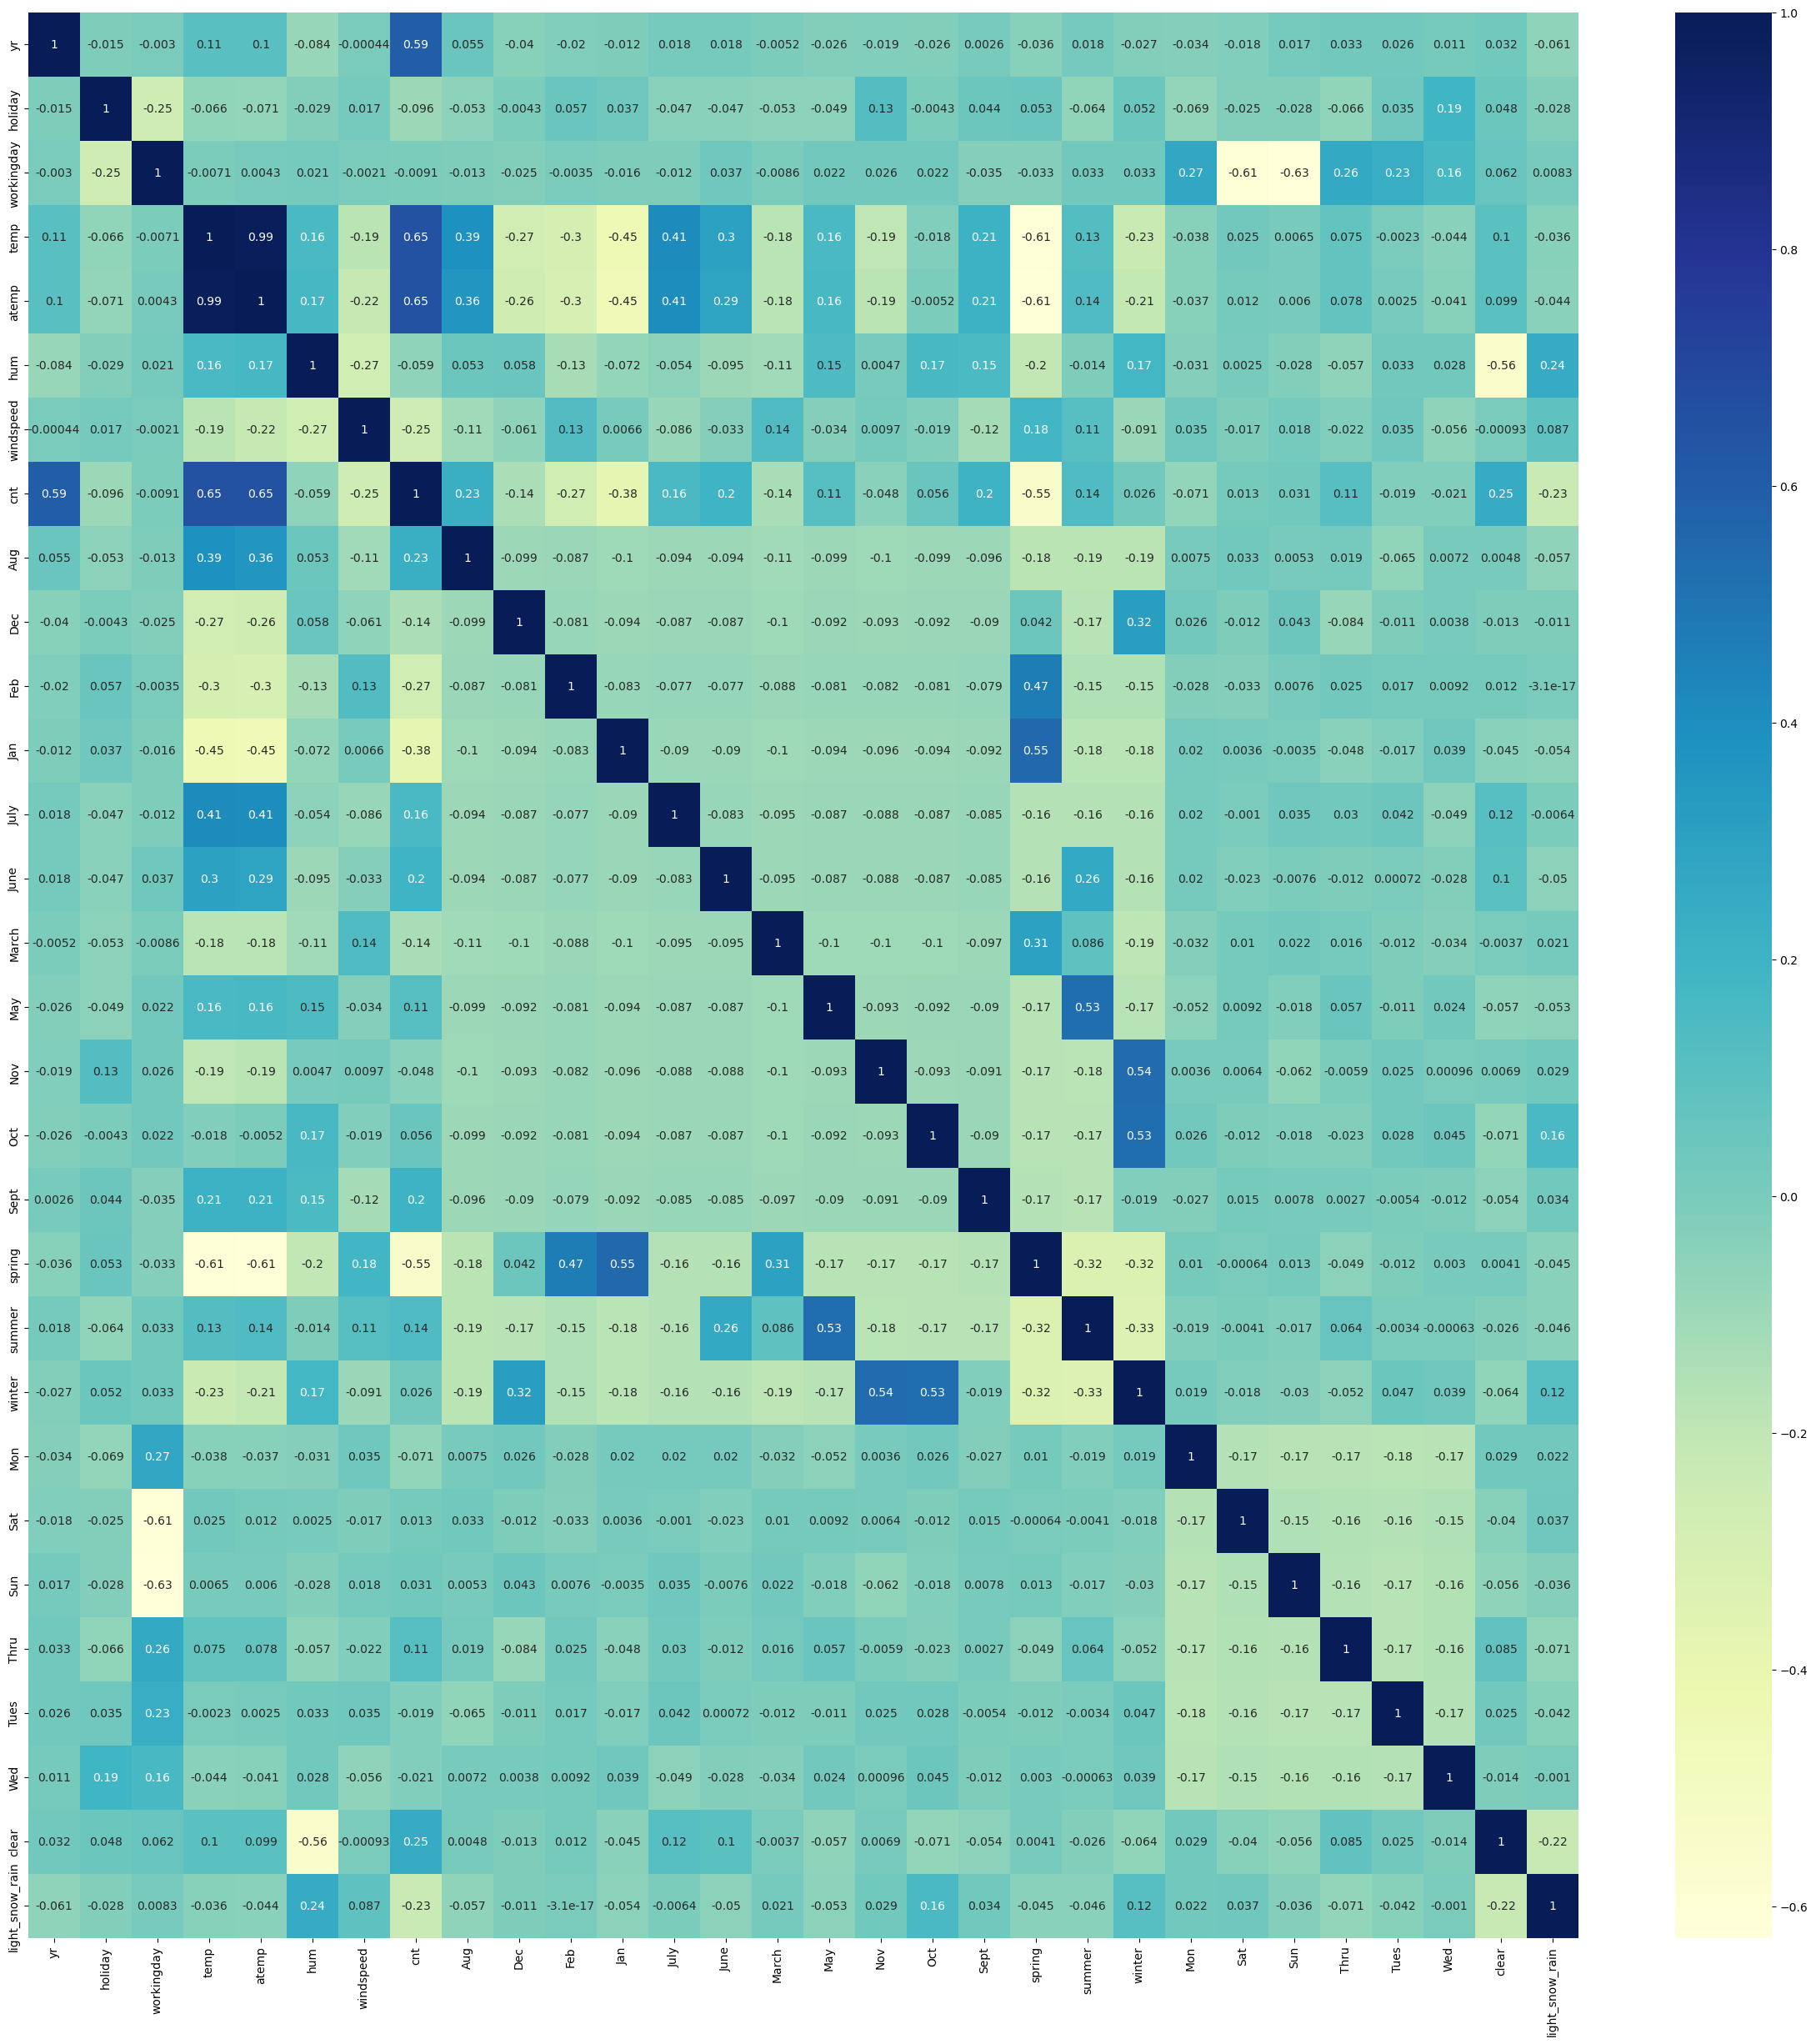

In [43]:
plt.figure(figsize=(30,30))
sns.heatmap(data_train.corr(), annot = True, cmap = 'YlGnBu');

- cnt with temp, atemp & yr have high corelation
- Winter with Nov, Oct month have high corelations
- Summar with may season & Spring with Jan & feb season have high corelations

In [44]:
# x_train, y_train
# xtrain have all data except cnt
# yrtrain only contain cnt

y_train = data_train.pop('cnt')
X_train = data_train

In [45]:
#Checking
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [46]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,1,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# Step :6 Building Model using RFE & Automated approach

In [47]:
# Building model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thru', False, 14),
 ('Tues', False, 7),
 ('Wed', False, 11),
 ('clear', True, 1),
 ('light_snow_rain', True, 1)]

In [50]:
# selecting the list of columns/variables which are selected through RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sept', 'spring', 'summer', 'winter', 'clear',
       'light_snow_rain'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]    #Checking whcih column rejected.

Index(['workingday', 'atemp', 'Aug', 'Feb', 'June', 'March', 'May', 'Oct',
       'Mon', 'Sat', 'Sun', 'Thru', 'Tues', 'Wed'],
      dtype='object')

In [52]:

# Calculating VIF for Variablesabcd

def VIF_Factor(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [53]:
X_train_rfe = X_train[col]

In [54]:
VIF_Factor(X_train_rfe)

,Features,VIF
3,hum,25.93
2,temp,21.39
10,spring,4.96
4,windspeed,4.70
12,winter,4.33
13,clear,3.56
11,summer,3.00
0,yr,2.09
8,Nov,1.87
6,Jan,1.76


#### Building the model using statsmodel



In [55]:
X_train_rfe = X_train[col]

In [56]:
X_train_lm = sm.add_constant(X_train_rfe)

In [57]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          8.15e-189
Time:                        21:41:03   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2654      0.039     

- Humidity Variable have highed VIF value lets drop Humidity column

In [59]:
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [60]:
VIF_Factor(X_train_new)

,Features,VIF
2,temp,5.87
3,windspeed,4.69
9,spring,2.97
11,winter,2.91
12,clear,2.86
10,summer,2.21
0,yr,2.07
7,Nov,1.82
5,Jan,1.64
6,July,1.60


#### 2nd Model

In [61]:
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train, X_train_lm_2).fit()

In [62]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          4.75e-186
Time:                        21:41:05   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1650      0.032     

- Nov high haigh P Value so dropping Nov column

In [63]:
X_train_new_2 = X_train_new.drop(['Nov'], axis = 1)

In [64]:
# Ching VIF after dropping Nov
VIF_Factor(X_train_new_2)

,Features,VIF
2,temp,5.81
3,windspeed,4.64
8,spring,2.97
11,clear,2.84
9,summer,2.21
0,yr,2.07
10,winter,2.05
5,Jan,1.64
6,July,1.60
7,Sept,1.33


#### Model 3

In [65]:
X_train_lm_3 = sm.add_constant(X_train_new_2)
lm_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          2.74e-186
Time:                        21:41:06   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1490      0.031     

- Dec Month has higher P values Drooping Dec Vairable

In [66]:
X_train_new_3 = X_train_new_2.drop(['Dec'], axis=1)

In [67]:
# Checking Vif
VIF_Factor(X_train_new_3)

,Features,VIF
2,temp,5.80
3,windspeed,4.64
7,spring,2.84
10,clear,2.84
8,summer,2.21
0,yr,2.07
9,winter,1.78
4,Jan,1.60
5,July,1.60
6,Sept,1.33


- It seems that VIF does not affecting too much afte droping variables

#### Model 4

In [68]:
X_train_lm_4 = sm.add_constant(X_train_new_3)
lm_4 = sm.OLS(y_train, X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          8.14e-187
Time:                        21:41:07   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1361      0.030     

- Dropping Jan variables bcz high P values

In [69]:
X_train_new_4 = X_train_new_3.drop(['Jan'], axis=1)

In [70]:
VIF_Factor(X_train_new_4)

,Features,VIF
2,temp,5.77
3,windspeed,4.62
9,clear,2.84
7,summer,2.19
6,spring,2.12
0,yr,2.07
8,winter,1.77
4,July,1.59
5,Sept,1.33
10,light_snow_rain,1.12


#### Model 5

In [71]:
X_train_lm_5 = sm.add_constant(X_train_new_4)
lm_5 = sm.OLS(y_train, X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          5.06e-187
Time:                        21:41:09   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1193      0.029     

- Dropping the July Variable as high P value

In [72]:
X_train_new_5 = X_train_new_4.drop(['July'], axis=1)

In [73]:
VIF_Factor(X_train_new_5)

,Features,VIF
2,temp,4.69
3,windspeed,4.62
8,clear,2.82
0,yr,2.07
5,spring,2.02
6,summer,1.85
7,winter,1.60
4,Sept,1.22
9,light_snow_rain,1.11
1,holiday,1.04


#### Model 6

In [74]:
X_train_lm_6 = sm.add_constant(X_train_new_5)
lm_6 = sm.OLS(y_train, X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          1.47e-186
Time:                        21:41:11   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1121      0.030     

In [75]:
X_train_new_6 = X_train_new_5.drop(['spring'], axis=1)

In [76]:
VIF_Factor(X_train_new_6)

,Features,VIF
2,temp,4.38
3,windspeed,3.18
7,clear,2.67
0,yr,2.00
5,summer,1.55
6,winter,1.35
4,Sept,1.20
8,light_snow_rain,1.11
1,holiday,1.04


#### Model 7

In [77]:
X_train_lm_7 = sm.add_constant(X_train_new_6)
lm_7 = sm.OLS(y_train, X_train_lm_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          2.83e-186
Time:                        21:41:12   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0476      0.017     

- Model 7 is our final model as:
- All vairables almost have 0 p values
- R square, Ajusted R Square, F-statistic have higher values
-  No major difference between R2 & adjusted R2
- All the VIF values are between 1 - 5 that means they are not highly corelated which means No multicolliner variables

In [78]:
lm_7.params

const              0.047551
yr                 0.232861
holiday           -0.098685
temp               0.548008
windspeed         -0.153246
Sept               0.101195
summer             0.088080
winter             0.129345
clear              0.078375
light_snow_rain   -0.204495
dtype: float64

# Step 7: Residual Analysis on train data

In [79]:
X_train_lm_7

,const,yr,holiday,temp,windspeed,Sept,summer,winter,clear,light_snow_rain
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,1,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0


In [80]:
y_train_pred = lm_7.predict(X_train_lm_7)
y_train_pred

576    0.764943
426    0.483717
728    0.391485
482    0.556437
111    0.266762
         ...   
578    0.803572
53     0.219894
350    0.246747
79     0.307973
520    0.642313
Length: 510, dtype: float64

In [81]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

NameError: name 'lr_model' is not defined

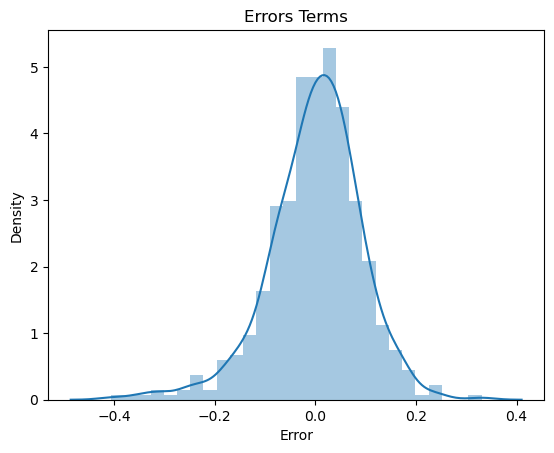

In [82]:
Residual = y_train - y_train_pred
sns.distplot(Residual)
plt.title('Errors Terms')
plt.xlabel('Error')
plt.show()

- Errors are normally distributed

#### Multi Colinearity

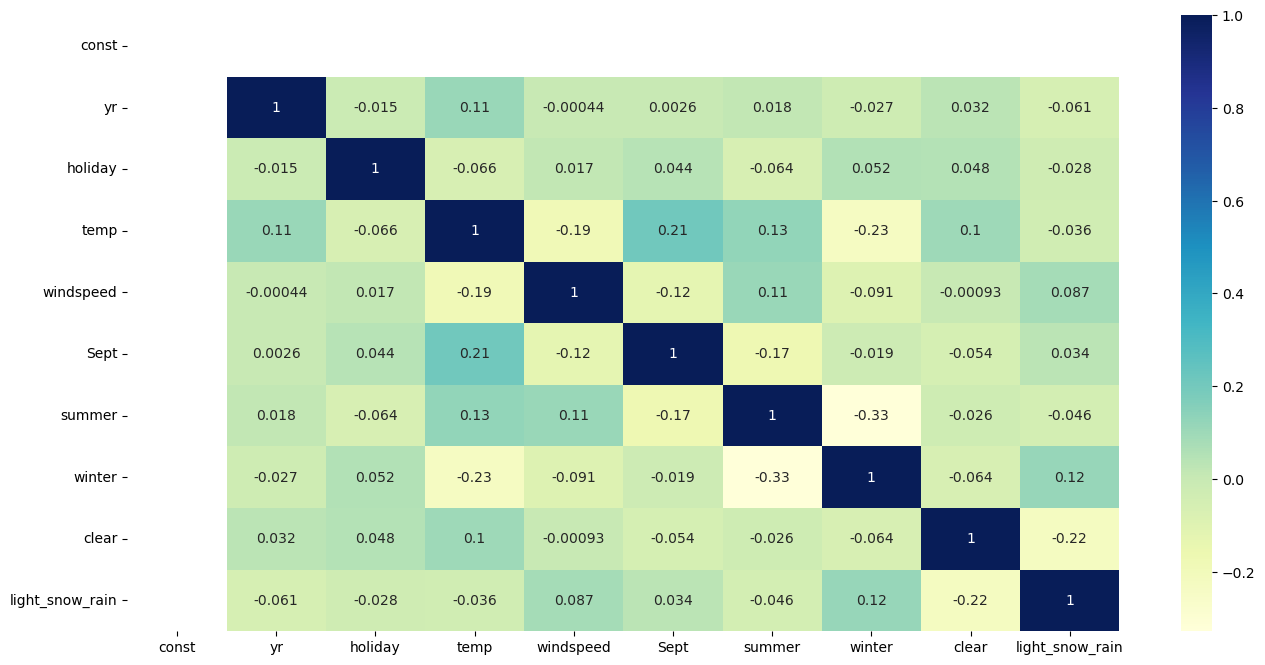

In [83]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train_lm_7.corr(), annot=True, cmap = 'YlGnBu');

- No Multi Colinerity found

# Step 8: Making Predictions Using the Final Model

In [84]:
num_variables

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [85]:
data_test[num_variables] = scaler.transform(data_test[num_variables])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,1,0


In [86]:
data_test.describe()   # checking scaling has been done or not

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thru,Tues,Wed,clear,light_snow_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# x_test, y_test
# x_test have all data except cnt
# y_test only contain cnt

y_test = data_test.pop('cnt')
X_test = data_test

In [88]:
co1_1 = X_train_new_6.columns
co1_1

Index(['yr', 'holiday', 'temp', 'windspeed', 'Sept', 'summer', 'winter',
       'clear', 'light_snow_rain'],
      dtype='object')

In [89]:
X_test = X_test[co1_1]
X_test

,yr,holiday,temp,windspeed,Sept,summer,winter,clear,light_snow_rain
184,0,1,0.831783,0.084219,0,0,0,0,0
535,1,0,0.901354,0.153728,0,1,0,1,0
299,0,0,0.511964,0.334206,0,0,1,0,0
221,0,0,0.881625,0.339570,0,0,0,1,0
152,0,0,0.817246,0.537414,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
702,1,0,0.519232,0.283397,0,0,1,1,0
127,0,0,0.584649,0.069510,0,1,0,1,0
640,1,0,0.745598,0.052115,0,0,1,0,0
72,0,0,0.331557,0.203418,0,0,0,1,0


In [90]:
# adding constant variables to test dataframe
X_test_lm = sm.add_constant(X_test)

In [91]:
y_pred = lm_7.predict(X_test_lm)

In [92]:
r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.7942

# Step 9: Model Evaluation

In [93]:
# Let's now plot the graph for actual versus predicted values.

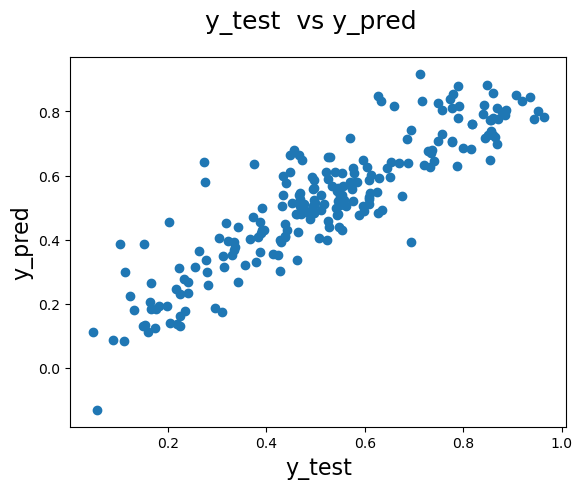

In [94]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred)
plt.suptitle('y_test  vs y_pred',  fontsize = 18)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16);

#### Calculating Adjusted R2 on test data set

In [96]:

#Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7854


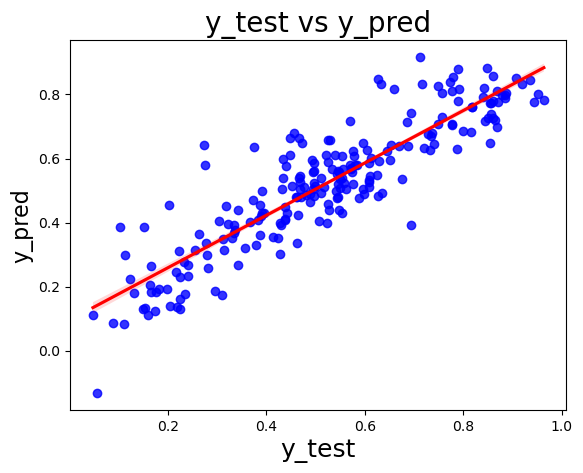

In [97]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

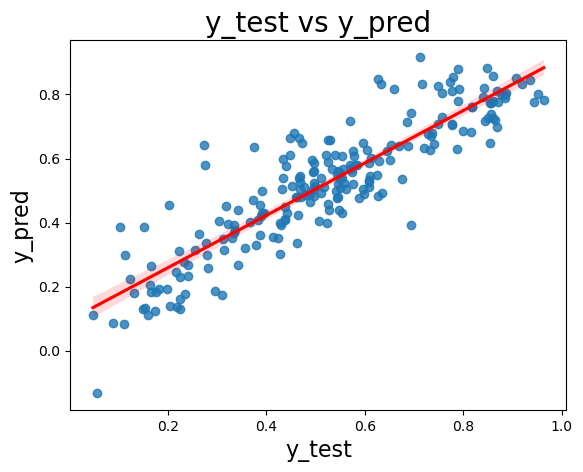

In [98]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True,  line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16);

- Comparison Between Traing & Test Data
- Train data R2 = 0.830
- Test Data R2 = 0.7942 
- Train data Adjusted R2 = 0.827 
- Test Data Adjusted R2 = 0.7854

# Conclusion

- Company should increase business on spring season.
- Also increase their business in lighr_Snow_rain season

# Significant variables for Demand of bikes as follows
- year
- Holiday
- temp
- Windspeed
- Summer
- winter
- clear
- light_snow_rain